In [1]:
cd ..

C:\Users\rajag\Desktop\convolve\convolve_epoch_1


In [2]:
cd data

C:\Users\rajag\Desktop\convolve\convolve_epoch_1\data


In [43]:
# import libraries
import pandas as pd 
import numpy as np
import json

In [44]:
# custom settings 
pd.set_option('display.max_colwidth', None)

In [45]:
# get the data 
with open('train.json', 'r') as f:
    dict_train = json.load(f)

df = pd.DataFrame.from_dict(dict_train, orient='index')
df.reset_index(level=0, inplace=True)
df.rename(columns = {'index':'log',0:'status'}, inplace = True)

In [46]:
# Prepare the training data
df_parsed = df.copy(deep=True)
df_parsed["log"]= df_parsed["log"].str.split(":", n = 3, expand = False)
df_temp = df_parsed.copy(deep=True)
df_temp = pd.DataFrame(df_parsed['log'].to_list(), columns=['log1','log2','log3','log4'])
df_temp['status'] = df_parsed['status']
df4 = df_temp[df_temp['log4'].isnull()].copy(deep=True)
df5 = df_temp[df_temp['log4'].notnull()].copy(deep=True)
train1 = df4.drop(['log4', 'log1', 'log2'], axis=1)
train2 = df5.drop(['log3', 'log1', 'log2'], axis=1)
train1.rename(columns = {'log3':'log'}, inplace = True)
train2.rename(columns = {'log4':'log'}, inplace = True)
tmp_list = [train1,train2]
train = pd.concat(tmp_list)
train = train.dropna()

In [47]:
# method 5, custom sampler
total_normal = train[train["status"] == "normal"]
total_abnormal = train[train["status"] == "abnormal"]

sampled_total_normal = total_normal.sample(n=69692)

normal_distributed_df = pd.concat([total_abnormal, sampled_total_normal])

balanced_train2 = normal_distributed_df.sample(frac=1,random_state=42)

In [8]:
test = pd.read_csv("test.csv")

In [9]:
df_parsed = test.copy(deep=True)
df_parsed[" Log"]= df_parsed[" Log"].str.split(":", n = 3, expand = False)
df_temp = df_parsed.copy(deep=True)
df_temp = pd.DataFrame(df_parsed[' Log'].to_list(), columns=['log1','log2','log3','log4'])
df_temp['ID'] = df_parsed['ID']
df4 = df_temp[df_temp['log4'].isnull()].copy(deep=True)
df5 = df_temp[df_temp['log4'].notnull()].copy(deep=True)
train1 = df4.drop(['log4', 'log1', 'log2'], axis=1)
train2 = df5.drop(['log3', 'log1', 'log2'], axis=1)
train1.rename(columns = {'log3':'log'}, inplace = True)
train2.rename(columns = {'log4':'log'}, inplace = True)
tmp_list = [train1,train2]
train = pd.concat(tmp_list)
test = train
# test = train.dropna()

In [10]:
test = test.fillna(test.mode().iloc[0])

In [11]:
test = test.sort_values("ID")

In [12]:
# https://www.kaggle.com/code/mesutbilgin/real-fake-job-posting-prediciton-bidirtnl-lstm#5--Bag-of-Words

In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Nlp library
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

# sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

#Tenserflow Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Have the data with you 

In [15]:
balanced_train2.fillna(" ", inplace = True)

In [99]:
text_list = []

for text in test.log: #for text in balanced_train2.log:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    text = nltk.word_tokenize(text)
    text = [word for word in text if not word in set(stopwords.words("english"))] # dropping stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)

In [100]:
len(text_list)

595300

In [101]:
print(text_list[0:100])

['kernel terminated reason', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info generating core', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info ce sym x bd mask x', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info generating core', 'j u ra kernel fatal data tlb error interrupt', 'message code', 'j u ra kernel info generating core', 'j u ra kernel info instruction cache parity error corrected', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info generating core', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info generating core', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel fatal data tlb error interrupt', 'failed read message prefix control stream ciostream socket', 'j u ra kernel fatal data tlb error interrupt', 'j u ra kernel info generating core', 'j u ra kernel info generating core', 'j u ra kernel fatal data storage interrupt

In [102]:
test.head()

,log,ID
0,kernel terminated for reason 1001\n,0
1,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,1
2,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,2
3,J03-U11 RAS KERNEL INFO generating core.6463\n,3
4,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,4


In [48]:
balanced_train2.head()

,log,status
3689235,J16-U01 RAS KERNEL INFO iar 00106588 dear 0245a40c\n,normal
2893210,J07-U11 RAS KERNEL INFO iar 003a92a0 dear 00efd9b8\n,normal
4150103,J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal
4087324,J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal
4140189,J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal


In [49]:
balanced_train2["status"] = balanced_train2["status"].map({"abnormal" : 0,"normal" : 1})

In [103]:
df1 = pd.DataFrame()
df1['text'] = text_list

In [104]:
len(df1)

595300

In [105]:
df1 = df1.drop(['ID'], axis=1)

KeyError: "['ID'] not found in axis"

In [106]:
df1.head()

,text
0,kernel terminated reason
1,j u ra kernel fatal data tlb error interrupt
2,j u ra kernel fatal data tlb error interrupt
3,j u ra kernel info generating core
4,j u ra kernel fatal data tlb error interrupt


In [50]:
df2 = pd.DataFrame()
df2['status'] = balanced_train2["status"]

In [56]:
df2['text'] = text_list

In [58]:
df2['word count'] = [len(i.split(' ')) for i in df2['text']]

In [59]:
df2.head()

,status,text,word count
3689235,1,x,1
2893210,1,j u ra kernel info iar dear c ec,9
4150103,0,j u ra kernel fatal data tlb error interrupt,9
4087324,0,j u ra kernel fatal data tlb error interrupt,9
4140189,0,j u ra kernel fatal data tlb error interrupt,9


In [60]:
df1 = df2

In [53]:
df1 = pd.DataFrame()
df1['text'] = text_list
df1['status'] = balanced_train2["status"]

In [108]:
df1['word count'] = [len(i.split(' ')) for i in df1['text']]

In [109]:
df1.head()

,text,word count
0,kernel terminated reason,3
1,j u ra kernel fatal data tlb error interrupt,9
2,j u ra kernel fatal data tlb error interrupt,9
3,j u ra kernel info generating core,7
4,j u ra kernel fatal data tlb error interrupt,9


In [110]:
sent_length = df1['word count'].max()

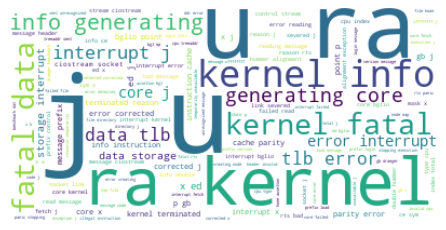

In [111]:
text = " ".join(i for i in df1['text'])
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [65]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df1['text'], 25)

In [67]:
max_features = 10000

In [68]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [69]:
# create the tokenizer
t = Tokenizer(num_words = max_features)
# fit the tokenizer on the documents
t.fit_on_texts(text_list)

In [112]:
encoded_docs = t.texts_to_sequences(text_list)

In [71]:
import joblib
joblib.dump(t, './tokinezer_file')

['./tokinezer_file']

In [113]:
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)# all reviews must be same lenght. we equals all reviews lenght

[[ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  9  5  6]
 [ 0  0  0 ...  9  5  6]
 ...
 [ 0  0  0 ...  9  5  6]
 [ 0  0  0 ...  9  5  6]
 [ 0  0  0 ... 10 12 11]]


In [73]:
y = df1['status'].values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [74]:
y = y.reshape(-1,1)
y.shape

(139384, 1)

In [114]:
X = np.array(embedded_docs)
X.shape

(595300, 30)

In [117]:
len(X)

595300

In [116]:
X_train

array([[ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ..., 20, 15, 14],
       [ 0,  0,  0, ...,  9,  5,  6],
       ...,
       [ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ...,  9,  5,  6]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

In [77]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (125445, 63)
X_test shape :  (13939, 63)
y_train shape:  (125445, 1)
y_test shape :  (13939, 1)


In [78]:
def eval_metrics(actual, prediction):
    print("Accuracy Score: {}".format(accuracy_score(actual, prediction)))
    print("Recall Score: {}".format(recall_score(actual, prediction)))
    print("f1 Score: {}".format(f1_score(actual, prediction)))

In [79]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(max_features,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(20 )))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # make this f1 score
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 40)               9760      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 409,801
Trainable params: 409,801
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [81]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cp = ModelCheckpoint("./bidirectional_model/" ,save_best_only = True)## creaitng model checkpoint
hist = model1.fit(X_train, y_train, epochs = 5, batch_size = 64,  callbacks = cp, validation_data=(X_test,y_test))

Epoch 1/5
1959/1961 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9980

INFO:tensorflow:Assets written to: ./bidirectional_model\assets


INFO:tensorflow:Assets written to: ./bidirectional_model\assets


1961/1961 [==============================] - 59s 28ms/step - loss: 0.0220 - accuracy: 0.9980 - val_loss: 2.6402e-04 - val_accuracy: 1.0000
Epoch 2/5
1959/1961 [============================>.] - ETA: 0s - loss: 4.6179e-04 - accuracy: 0.9999

INFO:tensorflow:Assets written to: ./bidirectional_model\assets


INFO:tensorflow:Assets written to: ./bidirectional_model\assets


1961/1961 [==============================] - 63s 32ms/step - loss: 4.6157e-04 - accuracy: 0.9999 - val_loss: 6.0414e-05 - val_accuracy: 1.0000
Epoch 3/5
1961/1961 [==============================] - ETA: 0s - loss: 2.4648e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: ./bidirectional_model\assets


INFO:tensorflow:Assets written to: ./bidirectional_model\assets


1961/1961 [==============================] - 71s 36ms/step - loss: 2.4648e-04 - accuracy: 1.0000 - val_loss: 2.5617e-05 - val_accuracy: 1.0000
Epoch 4/5
1960/1961 [============================>.] - ETA: 0s - loss: 1.2398e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: ./bidirectional_model\assets


INFO:tensorflow:Assets written to: ./bidirectional_model\assets


1961/1961 [==============================] - 62s 31ms/step - loss: 1.2398e-04 - accuracy: 1.0000 - val_loss: 1.5290e-05 - val_accuracy: 1.0000
Epoch 5/5
1961/1961 [==============================] - ETA: 0s - loss: 9.9707e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: ./bidirectional_model\assets


INFO:tensorflow:Assets written to: ./bidirectional_model\assets


1961/1961 [==============================] - 60s 31ms/step - loss: 9.9707e-05 - accuracy: 1.0000 - val_loss: 5.2298e-06 - val_accuracy: 1.0000


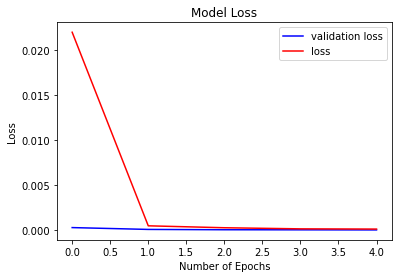

In [82]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

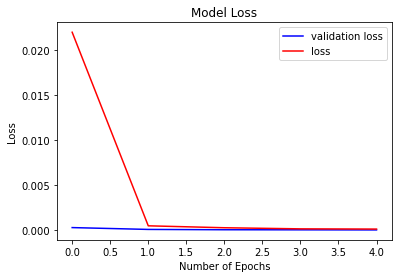

In [83]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [98]:
test.head()

,log,ID
0,kernel terminated for reason 1001\n,0
1,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,1
2,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,2
3,J03-U11 RAS KERNEL INFO generating core.6463\n,3
4,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,4


In [95]:
X_train

array([[ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ..., 20, 15, 14],
       [ 0,  0,  0, ...,  9,  5,  6],
       ...,
       [ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ...,  9,  5,  6],
       [ 0,  0,  0, ...,  9,  5,  6]])

In [97]:
len(X_test[1])

63

In [87]:
from tensorflow.keras.models import load_model
model1 = load_model("./bidirectional_model/")

In [118]:
y_pred = model1.predict(X)

18604/18604 [==============================] - 61s 3ms/step


In [119]:
y_pred = (y_pred > 0.5)

In [120]:
y_pred # my ans

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [84]:
y_train_pred = model1.predict(X_train)

3921/3921 [==============================] - 23s 6ms/step


In [85]:
y_train_pred = (y_train_pred > 0.5)

In [121]:
y_train_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6867
           1       1.00      1.00      1.00      7072

    accuracy                           1.00     13939
   macro avg       1.00      1.00      1.00     13939
weighted avg       1.00      1.00      1.00     13939



In [91]:
eval_metrics(y_test, y_pred)

Accuracy Score: 1.0
Recall Score: 1.0
f1 Score: 1.0


In [127]:
info(y_pred)

NameError: name 'info' is not defined

In [151]:
sub_new3 = test.copy(deep=True)
sub_new3['status'] = y_pred

In [152]:
sub_new3.head()

,log,ID,status
0,kernel terminated for reason 1001\n,0,True
1,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,1,False
2,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,2,False
3,J03-U11 RAS KERNEL INFO generating core.6463\n,3,True
4,J16-U01 RAS KERNEL FATAL data TLB error interrupt\n,4,False


In [153]:
sub_new3.rename(columns = {'status':' Label'}, inplace = True)
sub_new3 = sub_new3.drop(['log'], axis=1)
# sub_new[" Label"] = sub_new[" Label"].map({0:"abnormal",1:"normal"})

In [154]:
sub_new3.head()

,ID,Label
0,0,True
1,1,False
2,2,False
3,3,True
4,4,False


In [160]:
sub_new3[" Label"] = sub_new3[" Label"].astype(int)

NameError: name 'int64' is not defined

In [156]:
sub_new3.head()

,ID,Label
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0


In [157]:
convert_to_words = sub_new3.copy(deep=True)

In [175]:
convert_to_words[" Label"] = convert_to_words[" Label"].map({1 : "normal",0 : "abnormal"})

In [176]:
convert_to_words.head()

,ID,Label
0,0,normal
1,1,abnormal
2,2,abnormal
3,3,normal
4,4,abnormal


In [150]:
sub_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595300 entries, 0 to 595299
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      595300 non-null  int64 
 1    Label  0 non-null       object
dtypes: int64(1), object(1)
memory usage: 13.6+ MB


In [147]:
sub_new2[" Label"] = sub_new[" Label"].map({0:"abnormal",1:"normal"})

In [ ]:
sub_new = test.copy(deep=True)
sub_new['status'] = y_pred
sub_new.rename(columns = {'status':' Label'}, inplace = True)
sub_new = sub_new.drop(['log'], axis=1)
sub_new[" Label"] = sub_new[" Label"].map({0:"abnormal",1:"normal"})

In [ ]:
# sub_new[" Label"] = sub_new[" Label"].map({0:"abnormal",1:"normal"})

In [ ]:
# sub_new= sub_new.loc[:,~sub_new.columns.duplicated()].copy()

In [ ]:
sub_new.head()

In [164]:
len(sub_new3[sub_new3[" Label"] == 0])/len(sub_new)
# earlier 0.380398118595666

0.28749370065513186

In [177]:
convert_to_words.to_csv(r'C:\Users\rajag\Desktop\convolve\convolve_epoch_1\submission\submission_6.csv', index=False)